In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
census = pd.read_pickle("Intermediate Data/census_with_household.pkl")
census

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489
78653,14631.0,29.5,55073.0,21795.0,19328.0,32.8,60880.0,22020.0,225.0,1.032347,5807.0,10.544187
78660,67630.0,31.6,72137.0,27021.0,81698.0,33.8,78145.0,31515.0,4494.0,16.631509,6008.0,8.328597
78664,51942.0,31.1,62283.0,27852.0,60884.0,32.8,63923.0,27792.0,-60.0,-0.215424,1640.0,2.633142
78681,51409.0,34.3,89900.0,34144.0,56086.0,35.7,98444.0,36096.0,1952.0,5.716963,8544.0,9.503893


In [3]:
#drop outlier
census_drop = census.drop(78712)
census_drop

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489
78653,14631.0,29.5,55073.0,21795.0,19328.0,32.8,60880.0,22020.0,225.0,1.032347,5807.0,10.544187
78660,67630.0,31.6,72137.0,27021.0,81698.0,33.8,78145.0,31515.0,4494.0,16.631509,6008.0,8.328597
78664,51942.0,31.1,62283.0,27852.0,60884.0,32.8,63923.0,27792.0,-60.0,-0.215424,1640.0,2.633142
78681,51409.0,34.3,89900.0,34144.0,56086.0,35.7,98444.0,36096.0,1952.0,5.716963,8544.0,9.503893


In [4]:
census.index

Int64Index([78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681,
            78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721,
            78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730,
            78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739,
            78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
            78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759],
           dtype='int64', name='Zipcodes')

In [5]:
crime_2011 = pd.read_pickle("Intermediate Data/count_zipcode_type_2011.pkl")
crime_2011["Zip Code"] = crime_2011["Zip Code"].map("{:.0f}".format)
crime_2011.head()


,Zip Code,Highest Offense Description,Number of Occurances
0,78610,APPLIC TO REVOKE PROBATION,2
1,78610,BURGLARY OF VEHICLE,1
2,78610,CUSTODY ARREST TRAFFIC WARR,2
3,78610,HARASSMENT,1
4,78610,THEFT,1


In [6]:
crime_2016 = pd.read_pickle("Intermediate Data/count_zipcode_type_2016.pkl")
crime_2016["Zip Code"] = crime_2016["Zip Code"].map("{:.0f}".format)
crime_2016.head()

,Zip Code,Highest Offense Description,Number of Occurances
0,78610,DAMAGE CITY PROP,1
1,78610,DWI .15 BAC OR ABOVE,1
2,78610,FAILURE TO IDENTIFY,1
3,78610,TERRORISTIC THREAT,1
4,78613,AGG ROBBERY/DEADLY WEAPON,1


In [7]:
crime_2011_zipcodes = crime_2011["Zip Code"].unique()
# crime_2011_zipecodes
len(crime_2011_zipcodes)

53

In [8]:
crime_2016_zipcodes = crime_2016["Zip Code"].unique()
# crime_2016_zipecodes
len(crime_2016_zipcodes)

52

In [9]:
zipcode_difference = list(set(crime_2011_zipcodes)-set(crime_2016_zipcodes))
zipcode_difference

['78640']

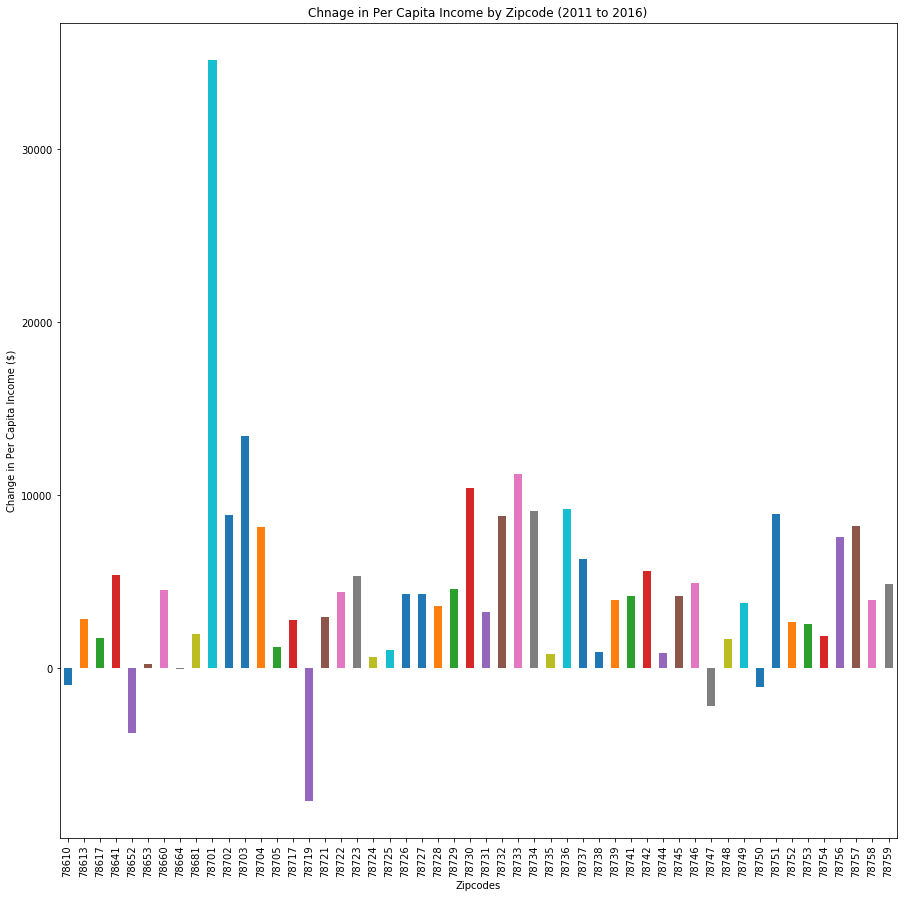

In [10]:
compare_pc_income = census_drop.plot(kind="bar", y="PC Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="Chnage in Per Capita Income by Zipcode (2011 to 2016)")
compare_pc_income.set_ylabel("Change in Per Capita Income ($)")
compare_pc_income

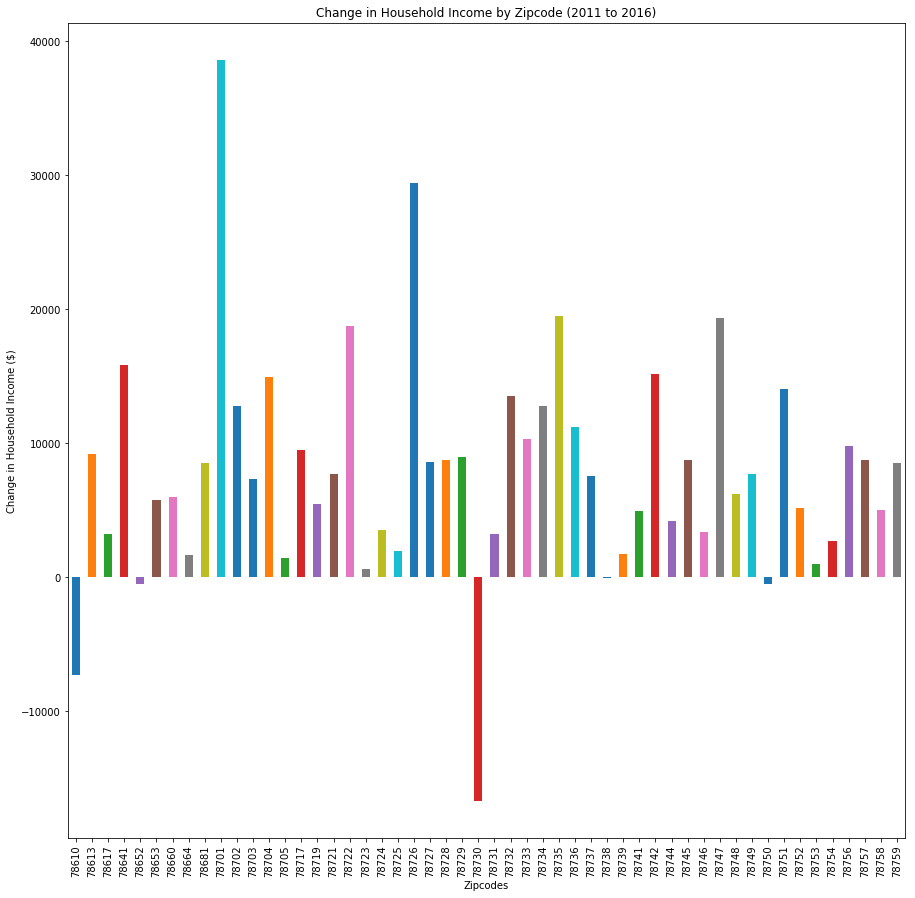

In [11]:
compare_hh_income = census_drop.plot(kind="bar", y="HH Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="Change in Household Income by Zipcode (2011 to 2016)")
compare_hh_income.set_ylabel("Change in Household Income ($)")
compare_hh_income